# 範例

根據以下的參考點，嘗試做透視變換

```
point1 = np.array([[60, 40], [420, 40], [420, 510], [60, 510]], dtype=np.float32)
point2 = np.array([[0, 80], [w, 120], [w, 430], [0, 470]], dtype=np.float32)
```

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('../data/lena.png')

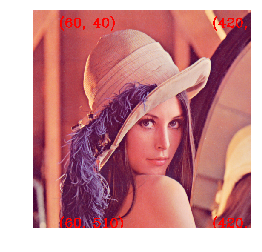

In [9]:
img_point = img.copy()
cv2.putText(img_point, '(60, 40)', (60, 40), 3, 1, (0, 0, 255), 2)
cv2.putText(img_point, '(420, 40)', (420, 40), 3, 1, (0, 0, 255), 2)
cv2.putText(img_point, '(420, 510)', (420, 510), 3, 1, (0, 0, 255), 2)
cv2.putText(img_point, '(60, 510)', (60, 510), 3, 1, (0, 0, 255), 2)

plt.axis('off')
plt.imshow(cv2.cvtColor(img_point, cv2.COLOR_BGR2RGB))

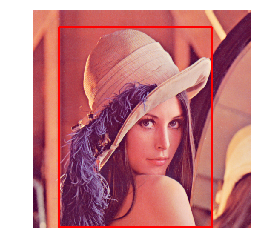

In [10]:
img_box = img.copy()
cv2.rectangle(img_box, (60, 40), (420, 510), (0, 0, 255), 3)

plt.axis('off')
plt.imshow(cv2.cvtColor(img_box, cv2.COLOR_BGR2RGB))

## 透視轉換

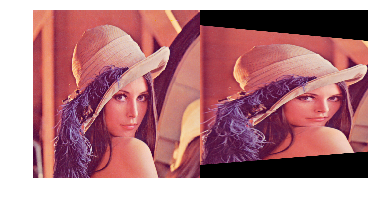

In [11]:
img_perspective = img.copy()
h, w = img.shape[:2]

# 設定四對點，並取得 perspective 矩陣
point1 = np.array([[60, 40], [420, 40], [420, 510], [60, 510]], dtype=np.float32)
point2 = np.array([[0, 80], [w, 120], [w, 430], [0, 470]], dtype=np.float32)
M = cv2.getPerspectiveTransform(point1, point2)

# perspective 轉換
img_perspective = cv2.warpPerspective(img, M, (w, h))

# 組合 + 顯示圖片
img_show = np.hstack((img, img_perspective))

plt.axis('off')
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
# while True:
#     cv2.imshow('perspective transform', img_show)
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break

In [12]:
h, w

(512, 512)